# Titanic Dataset Machine Learning Model

## Wprowadzenie

Poniższe opracowanie wykonano w oparciu o jeden z najpopularniejszych zbiorów danych dostępnych na platformie _kaggle.com_. Dotyczy on katastrofy Titanica i zawiera informacje nt. poszczególnych pasażerów, tj. m.in. tego czy przeżyli katastrofę, jaką klasą podróżowali czy skąd wyruszyli. Na jego podstawie przygotowano model uczenia maszynowego, który dokonuje klasyfikacji pasażerów na dwie grupy:

- pasażer przeżył katastrofę (1)
- pasażer nie przeżył katastrofy (0)

Jest to przykład uczenia nadzorowanego (ang. supervised learning). Pierwotny zbiór danych jest podzielony na dwa podzbiory: 
- treningowy, którego użyto do wytrenowania modelu oraz
- testowy, który posłużył do oceny utworzonego modelu

Kolejne kolumny zbioru:

    Survived  -  Survival (0 = No, 1 = Yes)
    Pclass  -  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    Sex  -  gender
    Age  -  Age in years
    SibSp  -  Number of siblings / spouses aboard the Titanic
    Parch  -  Number of parents / children aboard the Titanic
    Ticket  -  Ticket number
    Fare  -  Passenger fare (price)
    Cabin  -  Cabin number
    Embarked  -  Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)    

## Konfiguracja środowiska

In [12]:
# Moduły podstawowe
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Ustawienia wyświetlania
pd.set_option('display.max_columns', 50)
pd.set_option('precision', 2)
%matplotlib inline

# Stałe dla lokalizacji na dysku
DIR = '.'

## Przygotowanie danych
#### Ładowanie danych do DataFrame:

In [6]:
# zbiór treningowy
X_full = pd.read_csv('./Titanic_dataset/train.csv', index_col='PassengerId')

# zbiór testowy
X_test_full = pd.read_csv('./Titanic_dataset/train.csv', index_col='PassengerId')

#### Rzut oka na strukturę danych:

In [11]:
X_full.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S


In [10]:
print(X_full.shape)
X_full.info()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Zbiór, którego użyjemy to trenowania modelu składa się z 891 obserwacji, co oznacza, że jest on bardzo mały jak na standardy uczenia maszynowego. Wyraźnie widać, że atrybut _Cabin_ zawiera jedynie 204 wartości niezerowe, co oznacza, że cecha ta nie została zdefiniowana dla blisko 80% obserwacji. Braki danych zawierają ponadto atrybuty _Age_ i _Embarked_.

In [13]:
X_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


#### Wizualizacja danych:

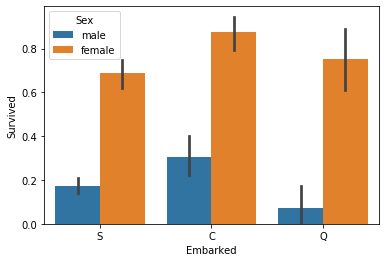

In [15]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=X_full)

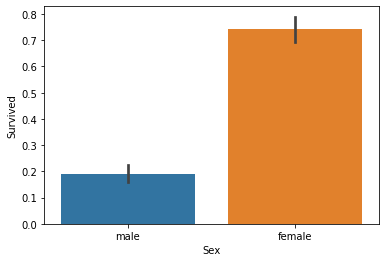

In [21]:
sns.barplot(x='Sex', y='Survived', data=X_full)

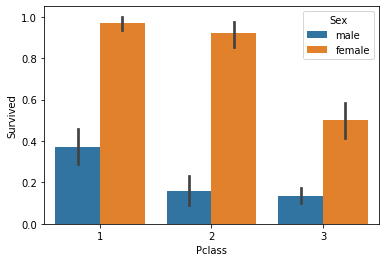

In [22]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=X_full)

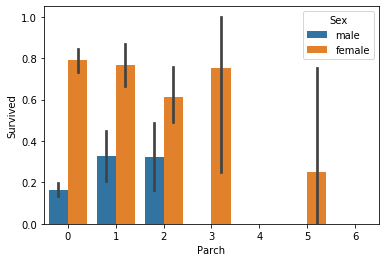

In [25]:
sns.barplot(x='Parch', y='Survived', hue='Sex', data=X_full)

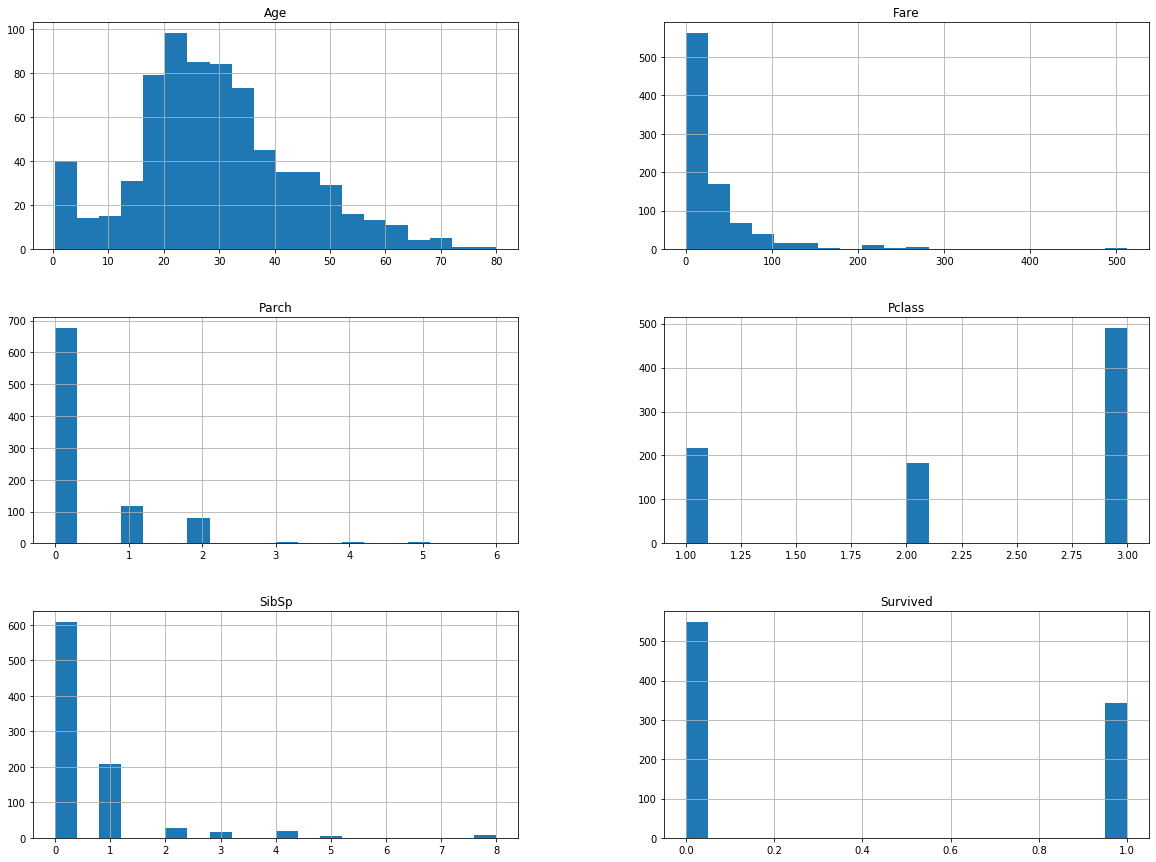

In [20]:
X_full.hist(bins=20, figsize=(20,15))
plt.show()

Ponad połowę pasażerów stanowiły osoby podróżujące 3 klasą. Katastrofę przeżyło nieporównywalnie więcej kobiet niż mężczyzn. Wyraźnie widać również, że najwyższa przeżywalność dotyczyła pasażerów podróżujących klasą 1.

## Missing data

In [11]:
# Size of training dataset
print(X_train.shape)

# Get the number of missing data points per column
miss_vals_count_by_col = X_train.isnull().sum()
print(miss_vals_count_by_col)

(712, 8)
Pclass        0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       547
Embarked      2
dtype: int64
